In [115]:
from gerrychain import Graph
import networkx as nx
import json
import pandas as pd
import geopandas as gpd

In [116]:
# graph = Graph.from_json('states/mn_blocks.json')
block_graph = Graph.from_json('states/PA_VTD.json')
gdf = gpd.read_file("states/shapefiles/PA_VTD_PLANS/PA_VTD_PLANS.shp")

In [117]:
gdf = gdf.to_crs({"init":"epsg:2271"})

gdf['x_cord'] = gdf.centroid.x
gdf['y_cord'] = gdf.centroid.y
gdf = gdf.reset_index()
pos = {}

for idx, row in gdf.iterrows():
    pos[row['index']] = (row['x_cord'], row['y_cord'])

/Users/jackgibson/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


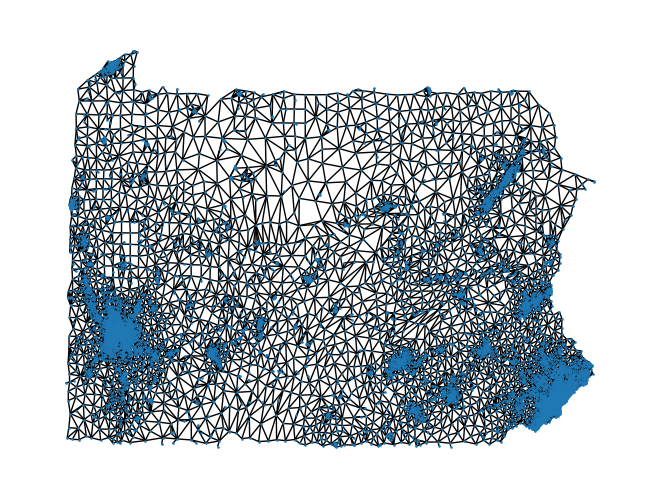

In [118]:
nx.draw(block_graph, pos, node_size=0.75)

In [28]:
cliq_lst  = list(nx.find_cliques(block_graph))
recursive = list(nx.find_cliques_recursive(block_graph))

list(nx.community.k_clique_communities(block_graph, 4, cliq_lst))

[frozenset({4, 5, 6, 24}),
 frozenset({10, 12, 13, 15}),
 frozenset({13, 370, 373, 438}),
 frozenset({29, 43, 45, 46}),
 frozenset({32, 59, 60, 170}),
 frozenset({70, 94, 462, 2443}),
 frozenset({97, 98, 99, 155, 2440}),
 frozenset({102, 2424, 2429, 2430}),
 frozenset({149, 2177, 2179, 2180}),
 frozenset({150, 178, 179, 180, 181}),
 frozenset({168, 185, 187, 189}),
 frozenset({198, 200, 203, 233}),
 frozenset({217, 604, 606, 607}),
 frozenset({237, 239, 243, 244}),
 frozenset({238, 239, 240, 245, 248, 266}),
 frozenset({258, 272, 273, 422}),
 frozenset({264, 297, 302, 341, 342}),
 frozenset({265, 1604, 1605, 1607, 1847}),
 frozenset({276, 344, 345, 352}),
 frozenset({304, 305, 306, 308}),
 frozenset({309, 310, 311, 2166}),
 frozenset({313, 315, 316, 319}),
 frozenset({320, 322, 323, 349, 352}),
 frozenset({356, 426, 918, 919}),
 frozenset({361, 362, 368, 2362}),
 frozenset({366, 1017, 1018, 1019}),
 frozenset({373, 436, 437, 698}),
 frozenset({382, 2106, 2107, 2189}),
 frozenset({386, 

19


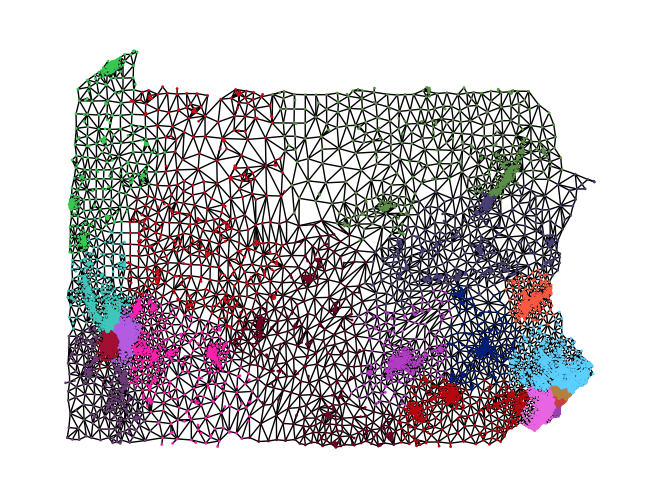

In [129]:
import random
import collections

communities = nx.community.louvain_communities(block_graph, resolution=0.35, seed=314)
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colors = get_colors(len(communities))

color_dict = dict(list(zip(colors, communities)))
node_map = {}
for color, node_set in color_dict.items():
    for node in node_set:
        node_map[node] = color

ordered = collections.OrderedDict(sorted(node_map.items()))
print(len(communities))
nx.draw(block_graph, pos, node_size=0.95, node_color=list(ordered.values()))

In [132]:
names = set()
for node in block_graph.nodes:
    names.add(block_graph.nodes[node]['NAME10'])

In [ ]:
# Recursive k-sized cities
# take the nodes with certain population level
# get their neighbors, if their population levels are similar add to subgraph
# recurively go through adding nodes until k is met or node is below pop level 

Text(0.5, 1.0, 'Degree Histogram for MA Census Blocks')

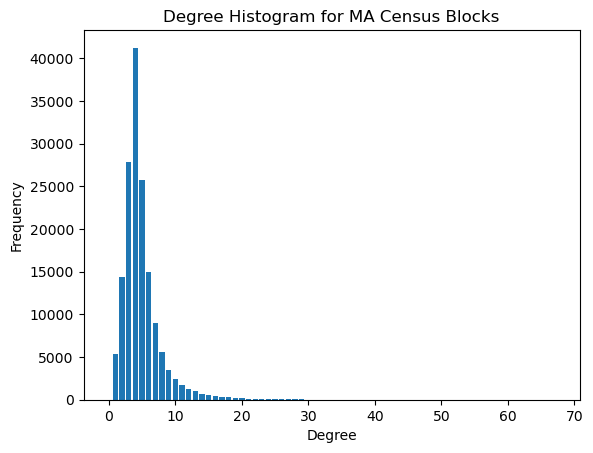

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

hist = nx.degree_histogram(block_graph)
len(hist)
hist_dict = {deg : freq for deg, freq in enumerate(hist)}

deg_df = pd.DataFrame({"degree" : list(hist_dict.keys()), "freq" : list(hist_dict.values())})
for_bar = deg_df
# for_bar.plot.bar(x='degree', y='freq') 
fig = plt.bar(for_bar['degree'], for_bar['freq'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Histogram for MA Census Blocks')

In [157]:
deg_df[deg_df['freq'] == deg_df['freq'].max()]

,degree,freq
4,4,80143


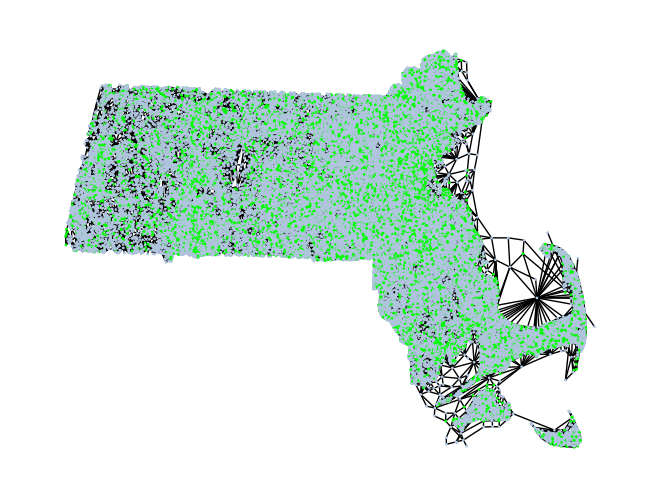

In [187]:
degree_dict = nx.degree(block_graph) 
degree_map = {}
for node, degree in nx.degree(block_graph):
    degree_map[node] = "lightsteelblue"
    if degree == 4:
        degree_map[node] = 'lime'

nx.draw(block_graph, pos_dic, node_size=0.95, node_color=list(degree_map.values()))

In unweighted graphs, the clustering of a node is the fraction of possible triangles through that node that exist. Measures are 1 if every neighbour connected to v i v_{i} is also connected to every other vertex within the neighbourhood, and 0 if no vertex that is connected to v i v_{i} connects to any other vertex that is connected to v i v_{i}

In [109]:
#cluster at block group level 
cluster_coef  = nx.clustering(bg_graph)
clust_df = pd.DataFrame({'node' : cluster_coef.keys(), 'coef' : cluster_coef.values()})
clust_df['coef'].describe()

count    2630.000000
mean        0.471194
std         0.225594
min         0.000000
25%         0.321429
50%         0.400000
75%         0.600000
max         1.000000
Name: coef, dtype: float64

In [110]:
for node in bg_graph.nodes:
    bg_graph.nodes[node]['cluster coef'] = cluster_coef[node]
    

In [111]:
color_map = {}
for node, coef in cluster_coef.items():
    color_map[node] = "lightsteelblue"
    if coef >= clust_df['coef'].mean():
        color_map[node] = "navy"
    if coef == 1.0:
        color_map[node] = 'lime'

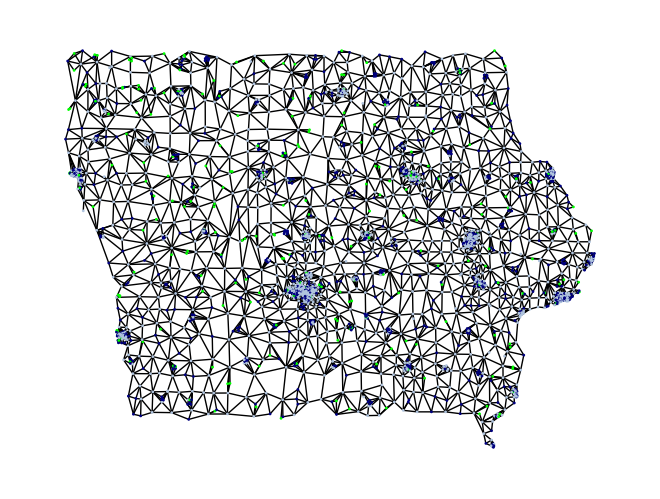

In [112]:
pos_dic = {}
for node in bg_graph.nodes:
    pos_dic[node] = (bg_graph.nodes[node]['C_X'], bg_graph.nodes[node]['C_Y'])

nx.draw(bg_graph, pos_dic, node_size=0.95, node_color=list(color_map.values()))

In [115]:
urban_above_mean = 0
rural_above_mean = 0
urban_else = 0
rural_else = 0

for node, coef in cluster_coef.items():
    if coef == 1.0:
        urban_above_mean += bg_graph.nodes[node]['UPOP']
        rural_above_mean += bg_graph.nodes[node]['RPOP']
    else:
        urban_else += bg_graph.nodes[node]['UPOP']
        rural_else += bg_graph.nodes[node]['RPOP']

In [116]:
print('Precent urban population in above average clusters:', urban_above_mean/(urban_above_mean + rural_above_mean))
print('Precent urban population in below average clusters:', urban_else/(urban_else + rural_else))


Precent urban population in above average clusters: 0.4509160136850237
Precent urban population in below average clusters: 0.6573888500766477


In [21]:
len(clust_df[clust_df['coef']==1.0])/len(clust_df)

0.07370469472147896

In [18]:
# At block level
block_coef  = nx.clustering(graph)
block_df = pd.DataFrame({'node' : block_coef.keys(), 'coef' : block_coef.values()})
block_df['coef'].describe()

count    259777.000000
mean          0.365290
std           0.303923
min           0.000000
25%           0.166667
50%           0.300000
75%           0.500000
max           1.000000
Name: coef, dtype: float64

In [19]:
len(block_df[block_df['coef']==1.0])/len(block_df)

0.12178907293563325

In [56]:
# Daryl's reported measure of assortativity

nx.degree_assortativity_coefficient(graph)

-0.04988985572070774

In [123]:
test = nx.erdos_renyi_graph(bg_graph.order(), nx.density(graph))

Notes on assortativity

Assortativity measures the similarity of connections in the graph with respect to the node degree.

**VTD Graphs**

In [133]:
vtd_graph = Graph.from_json('states/vtd/vtd_ma.json')
vtd_graph.nodes[0]

{'boundary_node': False,
 'area': 0.000666559418500041,
 'STATEFP20': '25',
 'COUNTYFP20': '013',
 'VTDST20': '000023',
 'GEOID20': '25013000023',
 'VTDI20': 'A',
 'NAME20': 'Agawam Town Precinct 4',
 'NAMELSAD20': 'Agawam Town Precinct 4',
 'LSAD20': '00',
 'MTFCC20': 'G5240',
 'FUNCSTAT20': 'N',
 'ALAND20': 5528750,
 'AWATER20': 597595,
 'INTPTLAT20': '+42.0770747',
 'INTPTLON20': '-072.6081367',
 'FILEID': 'PLST',
 'STUSAB': 'MA',
 'SUMLEV': '700',
 'GEOVAR': '00',
 'GEOCOMP': '00',
 'CHARITER': '000',
 'LOGRECNO': '0023875',
 'GEOID': '7000000US25013000023',
 'GEOCODE': '25013000023',
 'REGION': '1',
 'DIVISION': '1',
 'STATE': '25',
 'STATENS': '00606926',
 'COUNTY': '013',
 'COUNTYCC': 'H4',
 'COUNTYNS': '00606933',
 'CBSA': '44140',
 'MEMI': '1',
 'CSA': '999',
 'METDIV': '99999',
 'VTD': '000023',
 'VTDI': 'A',
 'AREALAND': 5528750,
 'AREAWATR': 597595,
 'BASENAME': 'Agawam Town Precinct 4',
 'NAME': 'Agawam Town Precinct 4',
 'FUNCSTAT': 'N',
 'POP100': 3604,
 'HU100': 1596,
 